# EDA and Feature Engineering on Flight Price Prediction 

Dataset link -> https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [1]:
pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhambathwal/flight-price-prediction")

print("Path to dataset files:", path)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\shubhambathwal\flight-price-prediction\versions\2


In [3]:
import os

# Printing all files in the downloaded dataset folder
print("Files in dataset folder:")
print(os.listdir(path))

Files in dataset folder:
['business.csv', 'Clean_Dataset.csv', 'economy.csv']


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = os.path.join(path, "Clean_Dataset.csv")

# Loading the dataset
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.shape

(300153, 12)

In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True) # Columns is removed 

In [8]:
# get the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
# Checking for any null values or duplicates
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

till now we get to know that there no missing and duplicate values into the dataset.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'AirAsia'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'GO_FIRST'),
  Text(4, 0, 'Indigo'),
  Text(5, 0, 'Air_India')])

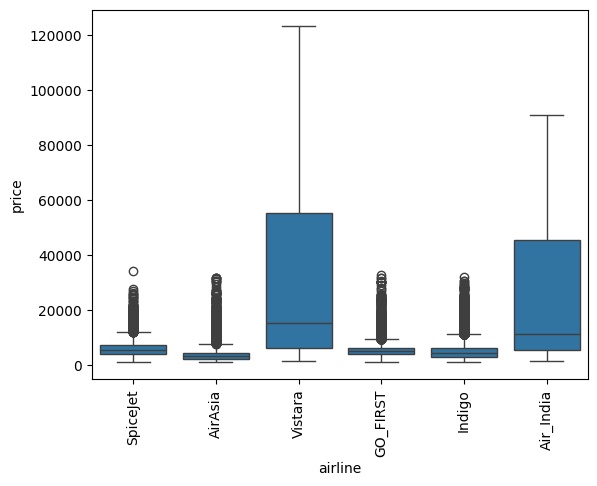

In [14]:
# Analyzing Flight Price trend 
sns.boxplot(data = df, x = 'airline', y = 'price')
plt.xticks(rotation = 90)

In [15]:
print(df['flight'].nunique())

1561


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Bangalore'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Chennai')])

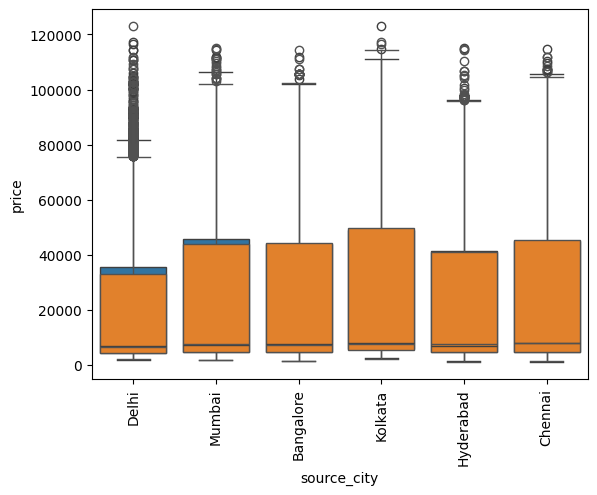

In [16]:
sns.boxplot(data=df, x='source_city', y='price')
sns.boxplot(data=df, x='destination_city', y='price')
plt.xticks(rotation=90)


Price Trend based on Stop

<Axes: xlabel='stops', ylabel='price'>

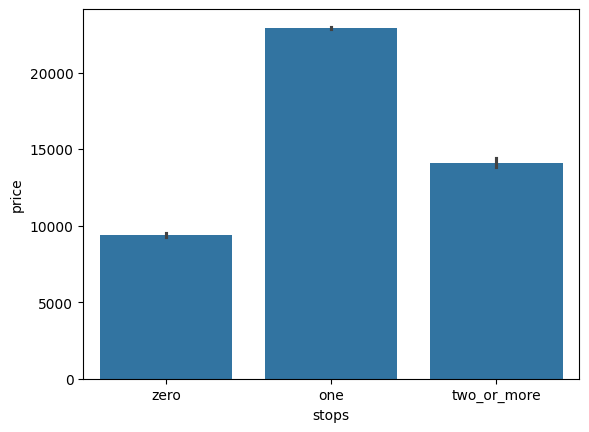

In [17]:
sns.barplot(data = df, x = 'stops', y = 'price', estimator= np.mean)

Analyzing how travel class affect price

<Axes: xlabel='class', ylabel='price'>

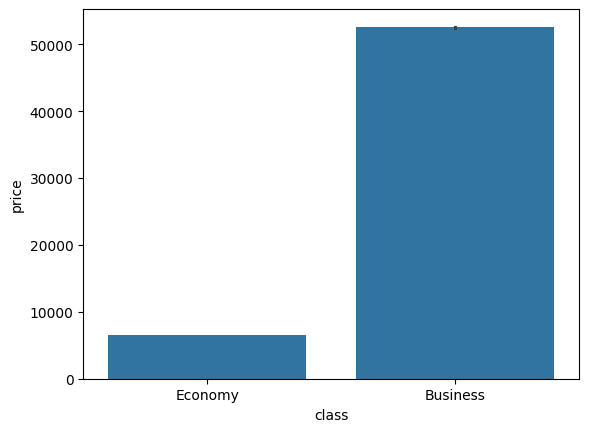

In [18]:
sns.barplot(data = df, x = 'class', y = 'price')

It means that Buisness class have relatively very high price than Economy ones

<Axes: xlabel='duration', ylabel='price'>

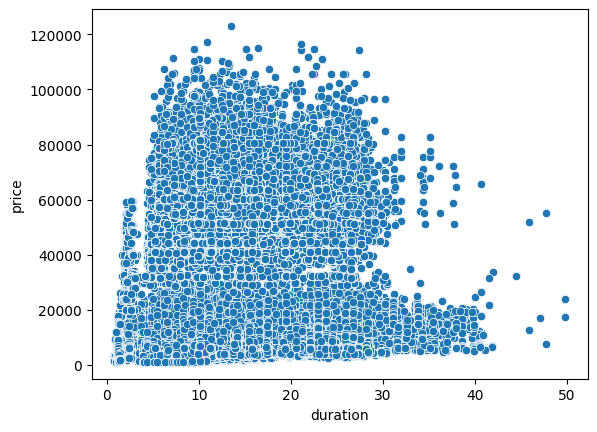

In [19]:
# Impact of duration on price
sns.scatterplot(data = df, x = "duration", y = 'price')

In [28]:
# First converting duration values from str to int or float
df['duration'] = pd.to_numeric(df['duration'], errors = 'coerce')

In [29]:
def duration_category(duration):
    if duration <= 12:
        return 'short'
    elif 12 < duration <= 30:
        return 'medium'
    else:
        return 'long'
    
df['duration_category'] = df['duration'].apply(duration_category)


In [32]:
df[['duration', 'duration_category']].head()

,duration,duration_category
0,2.17,short
1,2.33,short
2,2.17,short
3,2.25,short
4,2.33,short


<Axes: xlabel='duration_category', ylabel='price'>

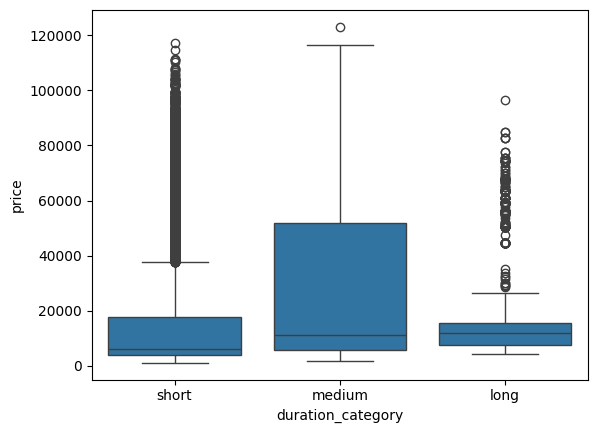

In [33]:
sns.boxplot(data = df, x = 'duration_category', y = 'price')

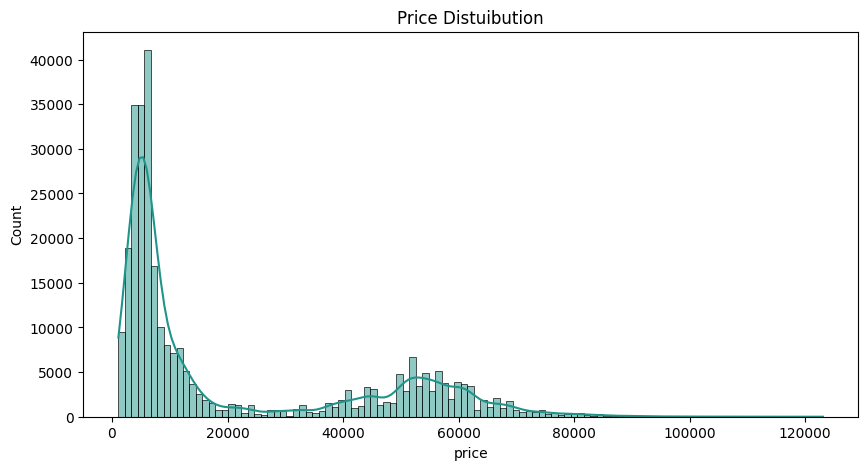

In [12]:
# Visualizing the distribution of Price
plt.figure(figsize = (10, 5))
sns.histplot(df['price'], kde=True, color="#20948B")
plt.title('Price Distuibution')
plt.show()

<Axes: xlabel='days_left', ylabel='price'>

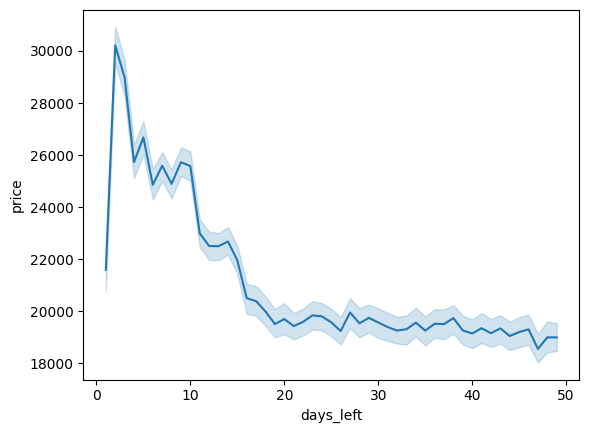

In [34]:
# Exploring how booking in advance impacts flight prices.
sns.lineplot(data = df, x = 'days_left', y = 'price')

<Axes: >

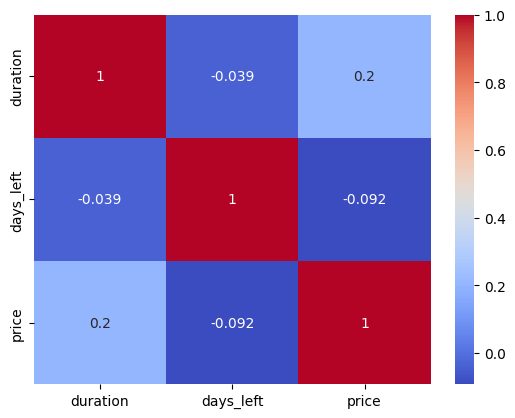

In [35]:
# Correlation
sns.heatmap(df[['duration', 'days_left', 'price']].corr(), annot = True, cmap = 'coolwarm')

Price by Airlines and Stops

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'AirAsia'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'GO_FIRST'),
  Text(4, 0, 'Indigo'),
  Text(5, 0, 'Air_India')])

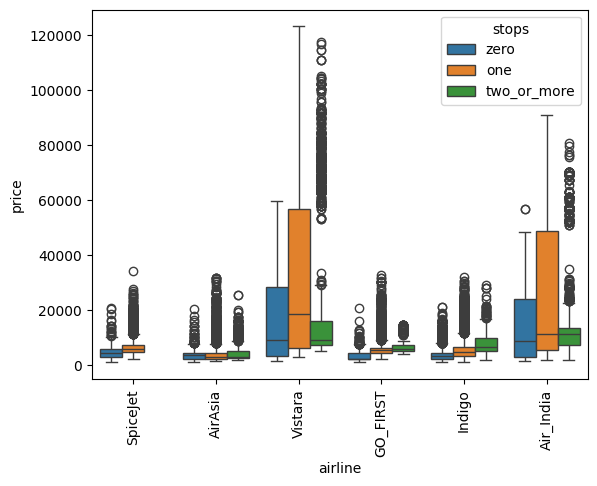

In [36]:
sns.boxplot(data=df, x='airline', y='price', hue='stops')
plt.xticks(rotation=90)


Price by Source and Destination

<Axes: xlabel='destination_city', ylabel='source_city'>

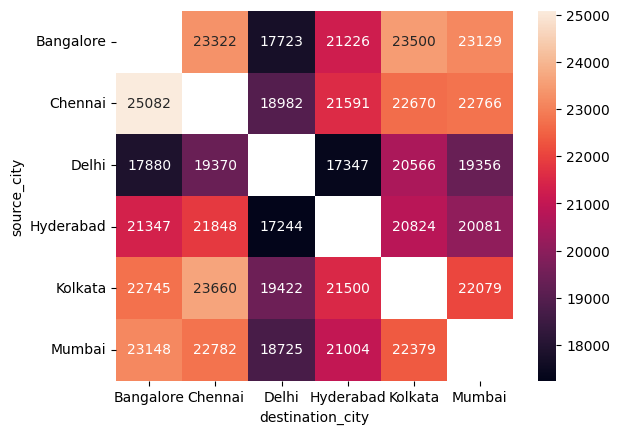

In [37]:
sns.heatmap(pd.pivot_table(df, values='price', index='source_city', columns='destination_city'), annot=True, fmt='.0f')